In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
cell_price = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')
cell_price.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
cell_price.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [4]:
cell_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
cell_price.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
cell_price.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [7]:
#changing columns names
cell_price.rename(columns = {
    'fc':'fcam_megapx',
    'm_dep': 'mobile_dep',
    'pc':'Pri_cam_megapx',
    'sc_h':'screen_ht',
    'sc_w':'screen_wd',  
}, inplace=True)

In [8]:
cell_price.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fcam_megapx',
       'four_g', 'int_memory', 'mobile_dep', 'mobile_wt', 'n_cores',
       'Pri_cam_megapx', 'px_height', 'px_width', 'ram', 'screen_ht',
       'screen_wd', 'talk_time', 'three_g', 'touch_screen', 'wifi',
       'price_range'],
      dtype='object')

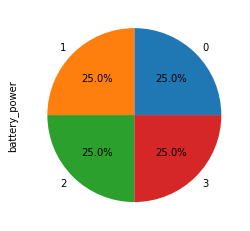

In [9]:
cell_range = cell_price.groupby('price_range')['battery_power'].count()
cell_range


cell_range.plot.pie(y='price_range', autopct='%1.1f%%')
plt.show()

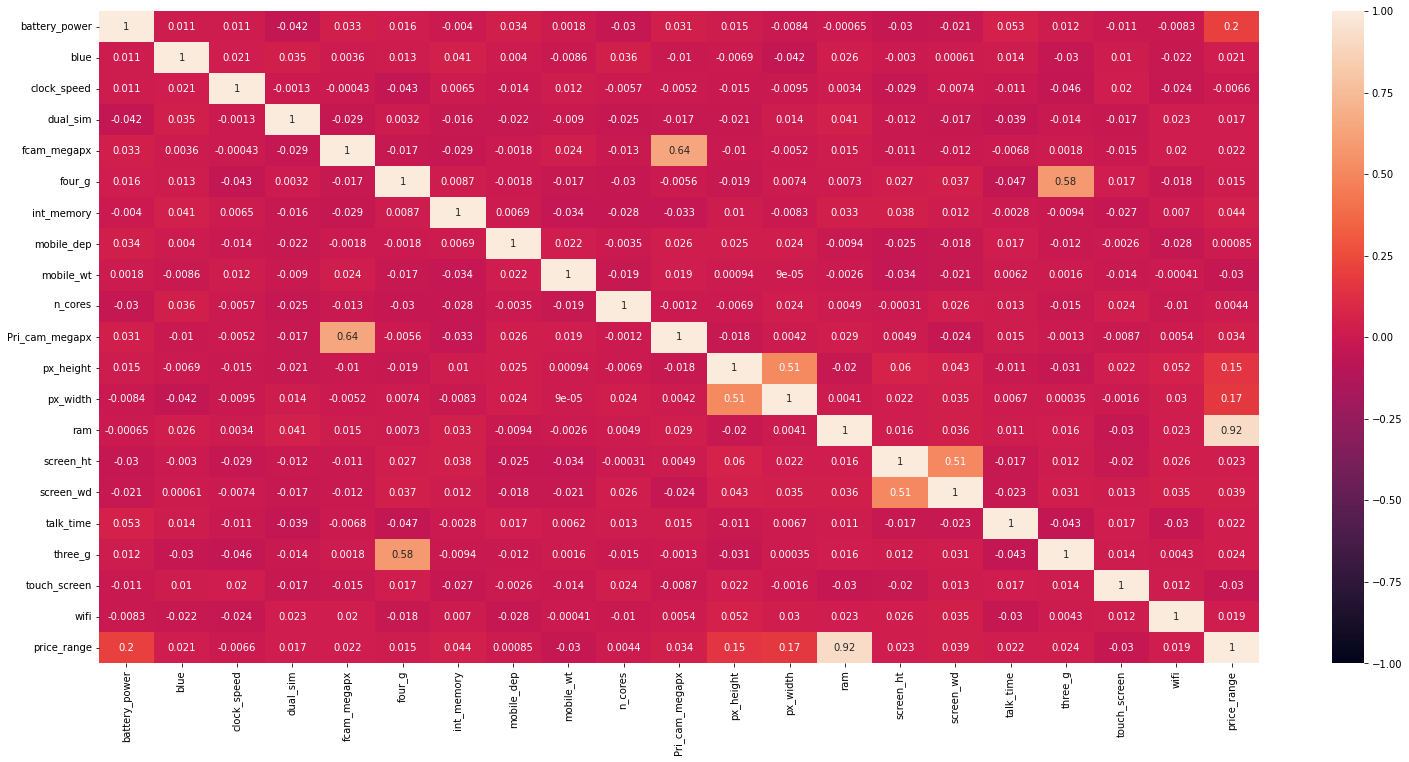

In [10]:
plt.figure(figsize=(26,12))
sns.heatmap(cell_price.corr(), vmin=-1, annot=True)
plt.show()

In [11]:
cell_price['screen_diag'] = np.sqrt((cell_price['screen_wd'] ** 2) + (cell_price['screen_ht'] ** 2)) / 2.54
cell_price[['screen_diag']]

,screen_diag
0,4.488880
1,6.796329
2,4.401709
3,7.042734
4,3.246540
...,...
1995,5.354910
1996,5.852783
1997,3.565112
1998,8.106795


In [12]:
cell_price['px_diag'] = np.sqrt((cell_price['px_width'] ** 2) + (cell_price['px_height'] ** 2))
cell_price[['px_diag']]

,px_diag
0,756.264504
1,2184.300575
2,2130.686509
3,2160.660084
4,1711.200748
...,...
1995,2250.640798
1996,2167.590829
1997,1848.471801
1998,749.530520


In [13]:
cell_price['ppi'] = cell_price['px_diag'] / cell_price['screen_diag']
cell_price[['ppi']]

,ppi
0,168.475113
1,321.394163
2,484.058963
3,306.792809
4,527.084472
...,...
1995,420.294822
1996,370.352162
1997,518.489087
1998,92.457066


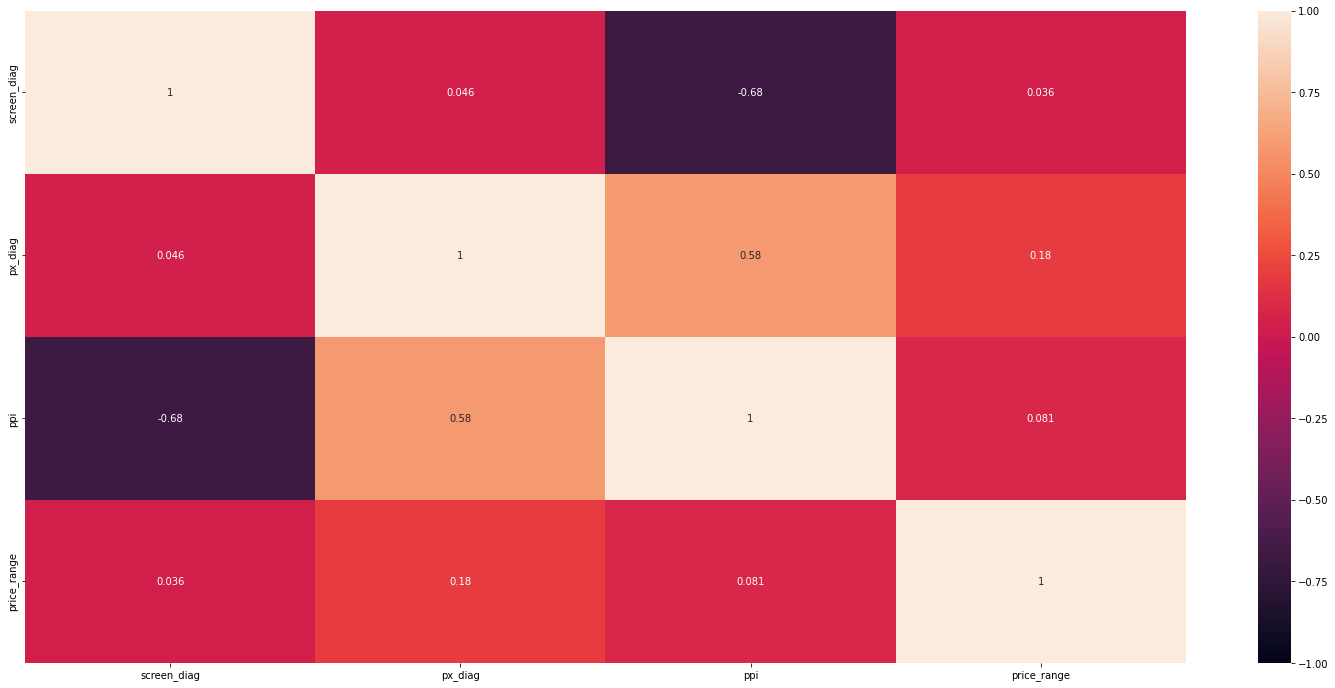

In [14]:
cols = cell_price[['screen_diag','px_diag','ppi','price_range']]
plt.figure(figsize=(26,12))
sns.heatmap(cols.corr(), vmin=-1, annot=True)
plt.show()

In [15]:
def show_plots(data, column, price_range='price_range'):
    plt.figure(figsize=(20,15))
    
    #boxplot
    plt.subplot(2,2,1)
    plt.boxplot(column, patch_artist= True, data=data)
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    
    #histogram
    plt.subplot(2,2,2)
    sns.histplot(data=data, x=column,kde=True, alpha=0.30)
    plt.title(f'Distribution of {column}')
    
    #stripplot
    plt.subplot(2,2,3)
    sns.stripplot(data=data, x=price_range, y=column)
    plt.title(f'Stripplot of {column}')
    
    plt.show()
    


## Battery Power

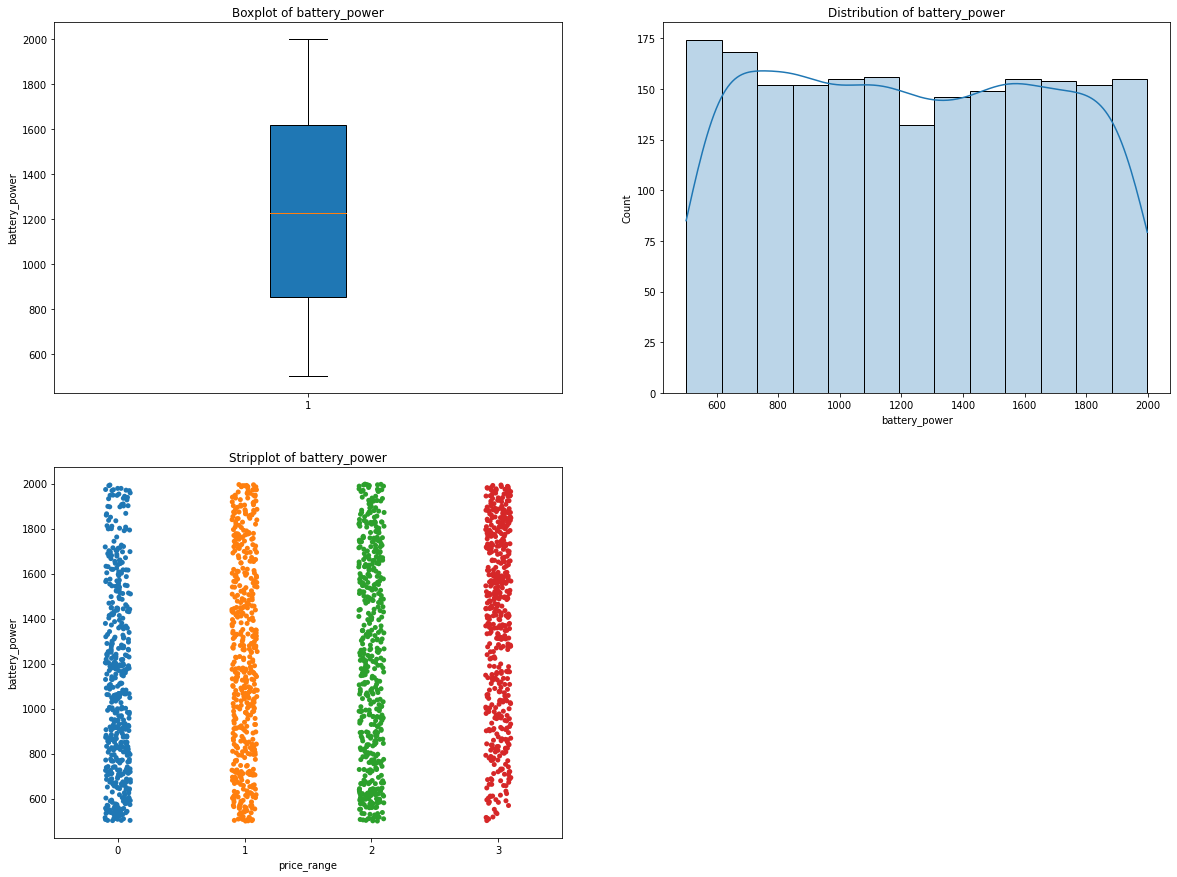

In [16]:
show_plots(cell_price, 'battery_power')

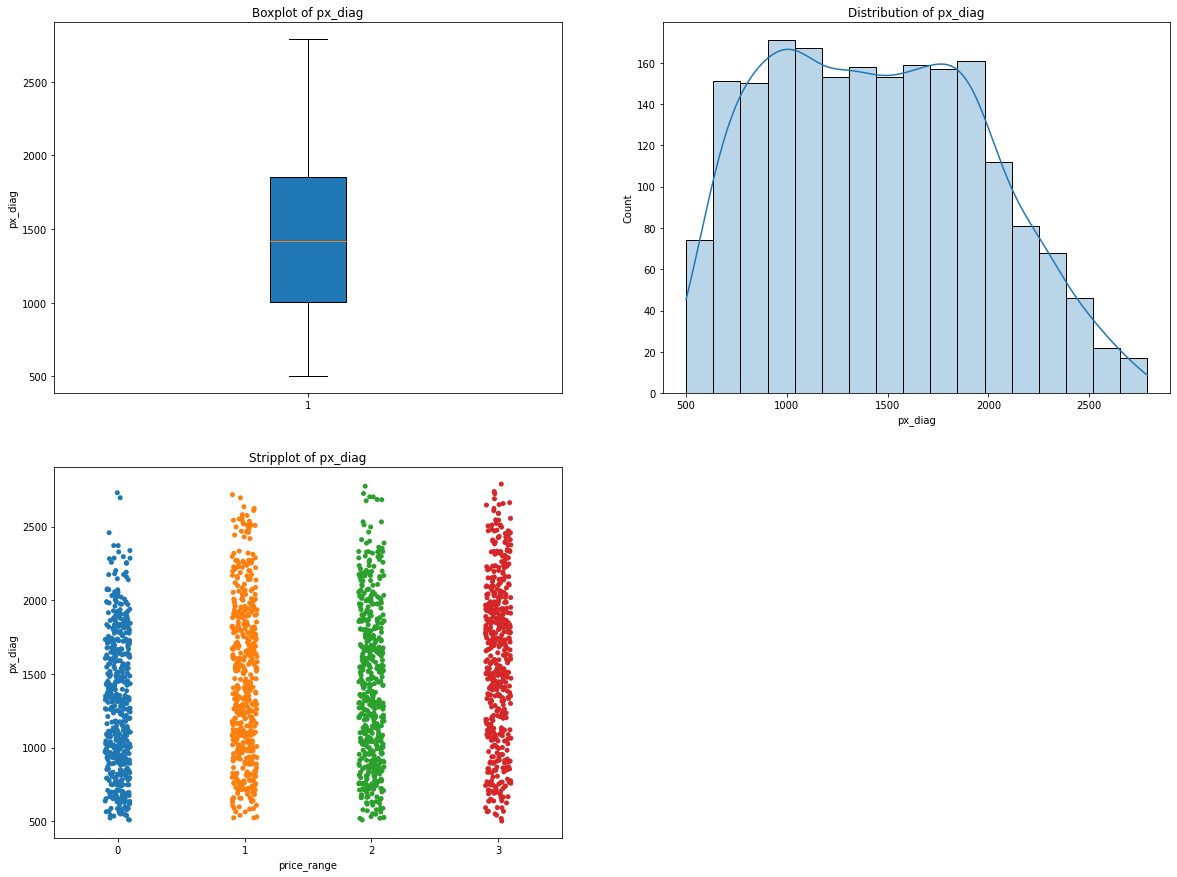

In [17]:
show_plots(cell_price, 'px_diag')

## Clock Speed

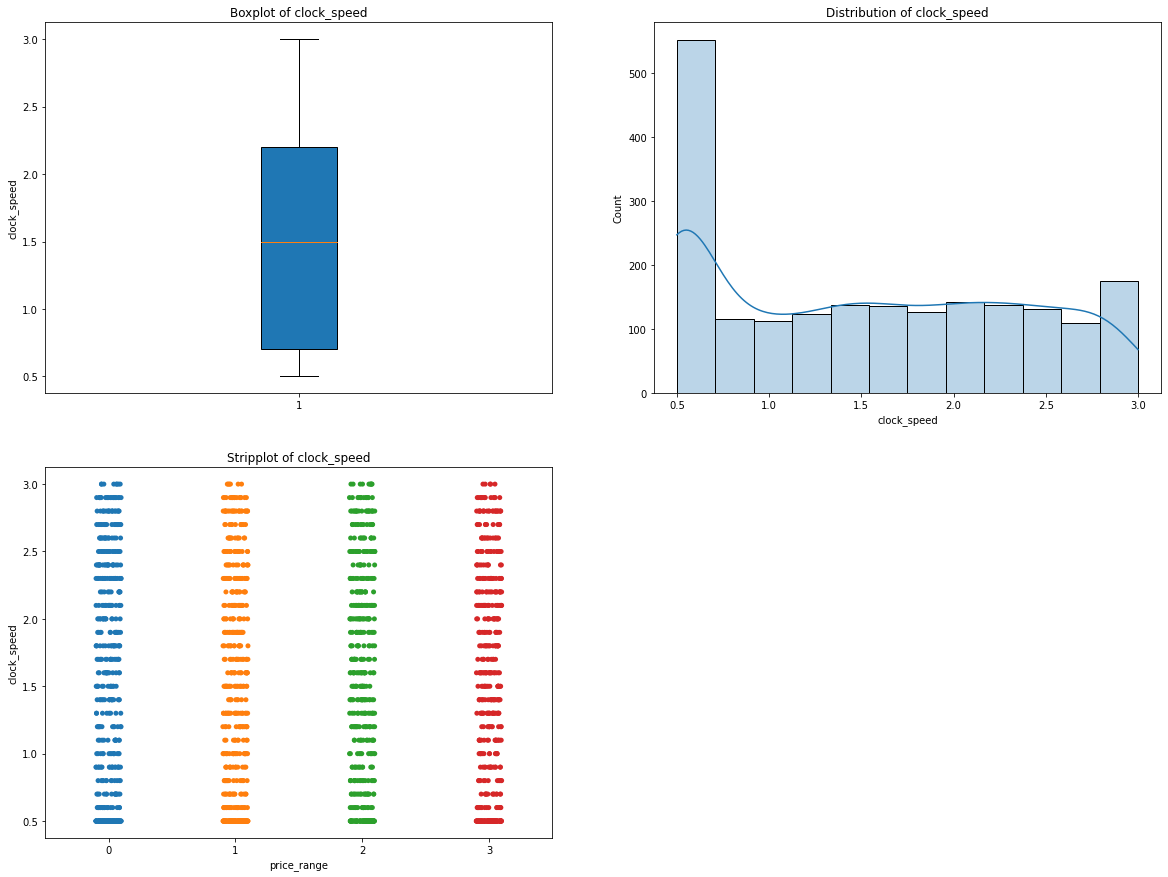

In [18]:
show_plots(cell_price, 'clock_speed')

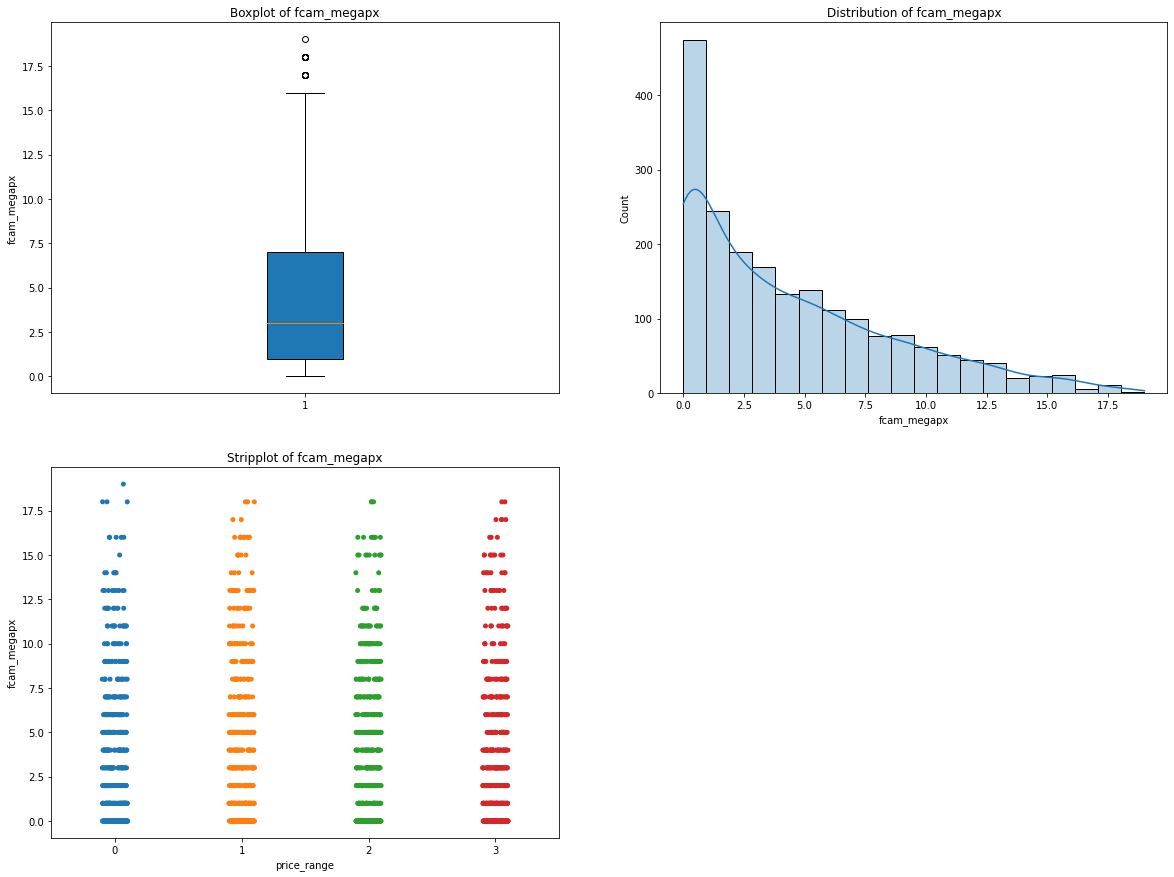

In [19]:
show_plots(cell_price, 'fcam_megapx')

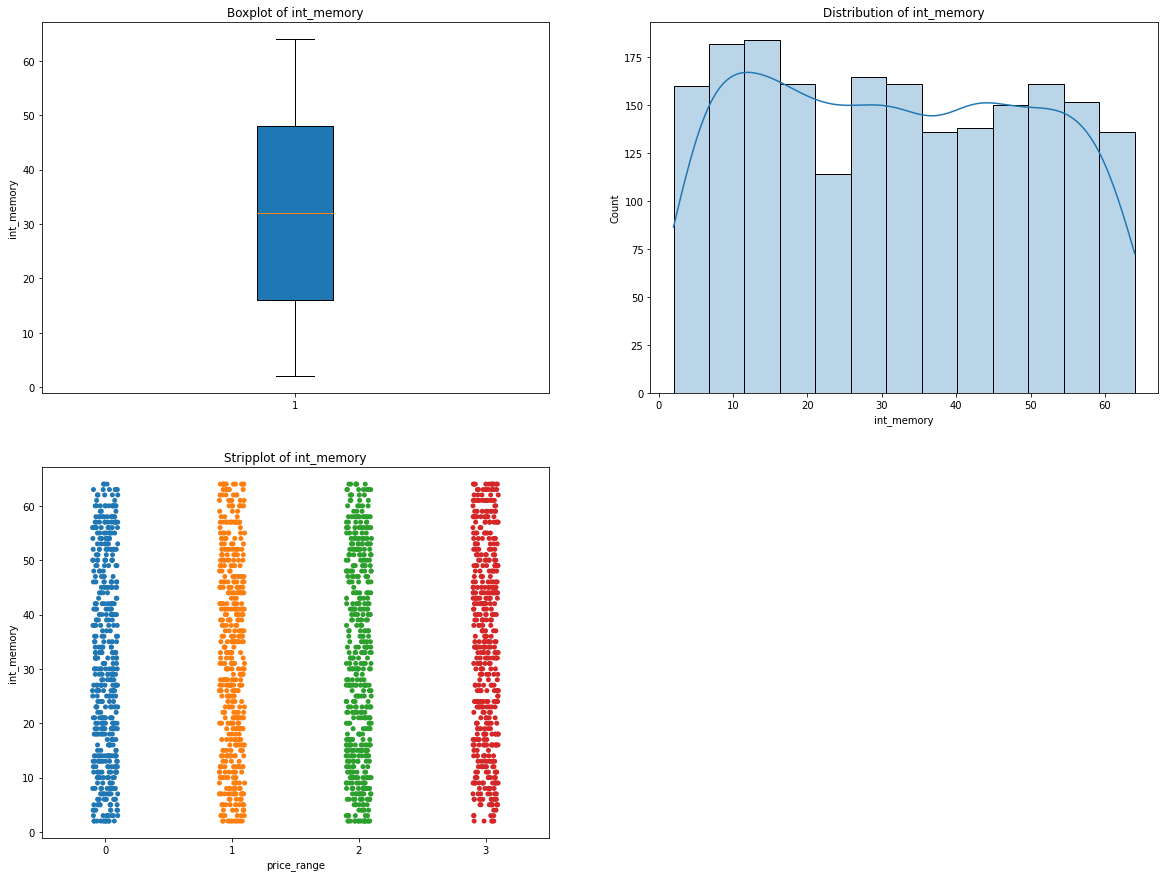

In [20]:
show_plots(cell_price, 'int_memory')

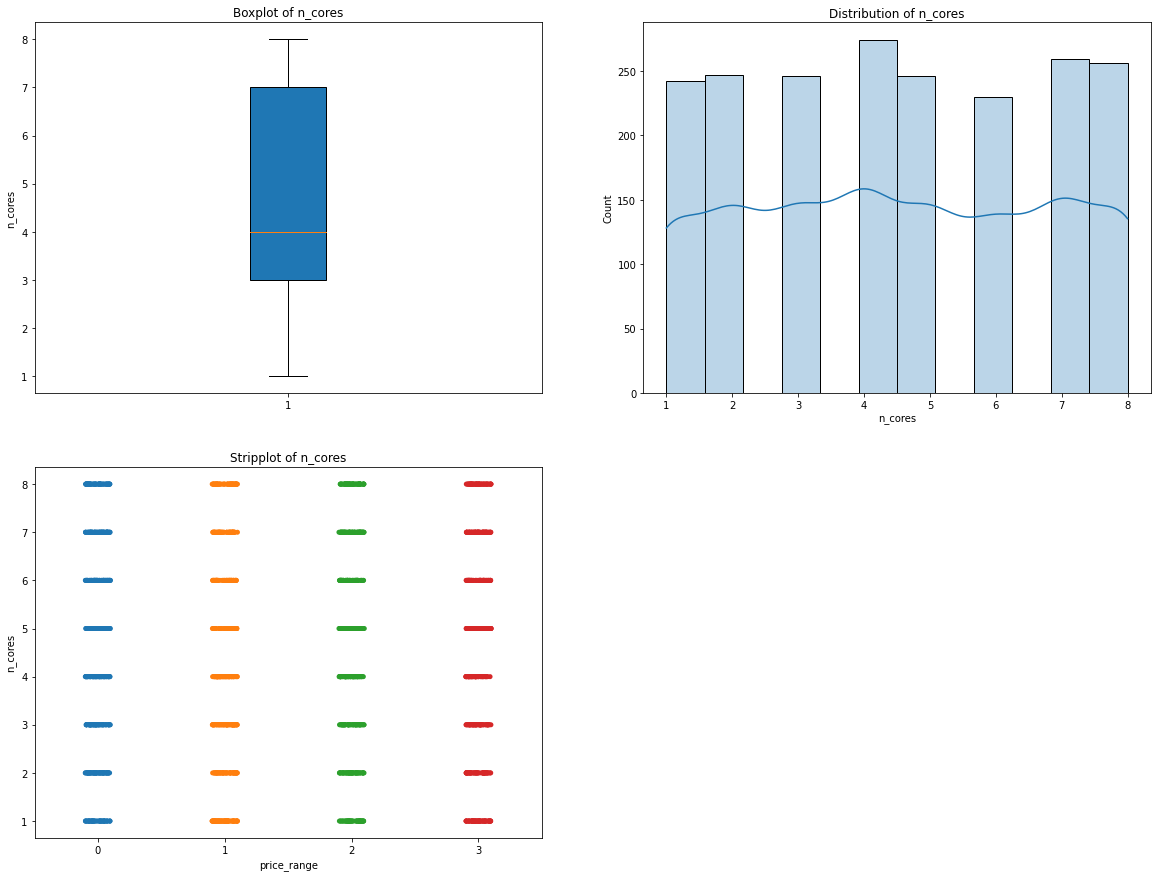

In [21]:
show_plots(cell_price, 'n_cores')

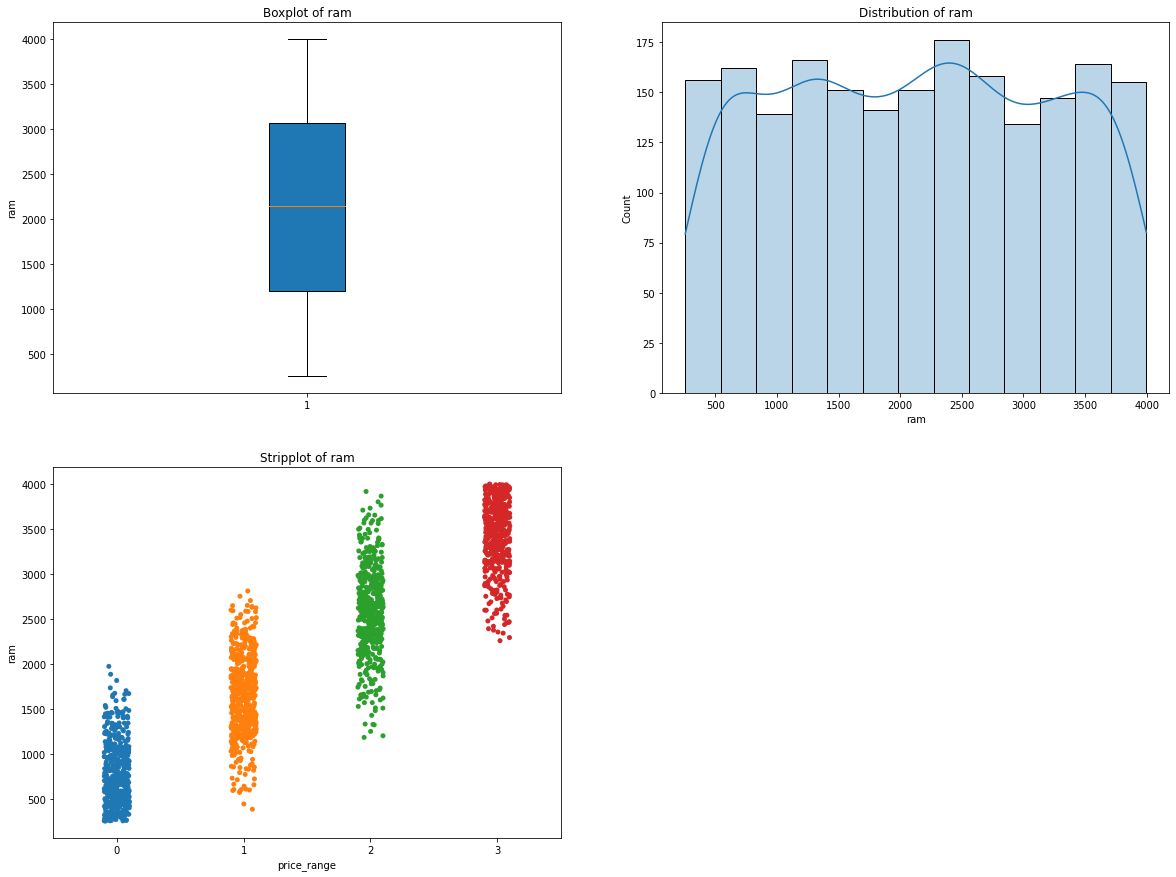

In [22]:
show_plots(cell_price, 'ram')

It really just seems that the ram is the determining factor of price. It also doesn't seem that making new features will help. Also maybe the battery_power and pixel diagonal


In [23]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
from sklearn.svm import SVC

In [24]:
X = cell_price[['battery_power','ram','px_diag']]
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

y= cell_price['price_range']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

In [26]:
def construct_heatmap(y_test, prediction, model_name):
    cm = confusion_matrix(y_test, prediction)
    plt.figure(figsize=(20,10))
    sns.heatmap(cm, annot=True)
    plt.ylabel('True price range')
    plt.xlabel('Predicted price range')
    plt.title(f'Heatmap of {model_name}')
    plt.show()

## Logistic Regression

In [27]:
LR = LogisticRegression()

parameters = {'C':[0.01, 0.1, 1,10],
              'penalty':['none','l2','l1'],
              'solver':['newton-cg','sag','saga','lbfgs']}

In [28]:
grid_LG= GridSearchCV(LR, parameters)
grid_LG.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Sett

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'penalty': ['none', 'l2', 'l1'],
                         'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']})

In [29]:
print('Best parameters :', grid_LG.best_params_)
print('accuarcy :', grid_LG.best_score_)

Best parameters : {'C': 0.01, 'penalty': 'none', 'solver': 'newton-cg'}
accuarcy : 0.9450000000000001


In [30]:
yhat = grid_LG.predict(X_test)
yhat_prob = grid_LG.predict_proba(X_test)
print('Accuracy score :', accuracy_score(y_test, yhat))
print('Jaccard_score :', jaccard_score(y_test,yhat, average='weighted'))
print('Log Loss: ', log_loss(y_test, yhat_prob))

Accuracy score : 0.94
Jaccard_score : 0.8872009754402624
Log Loss:  0.13335819060730172


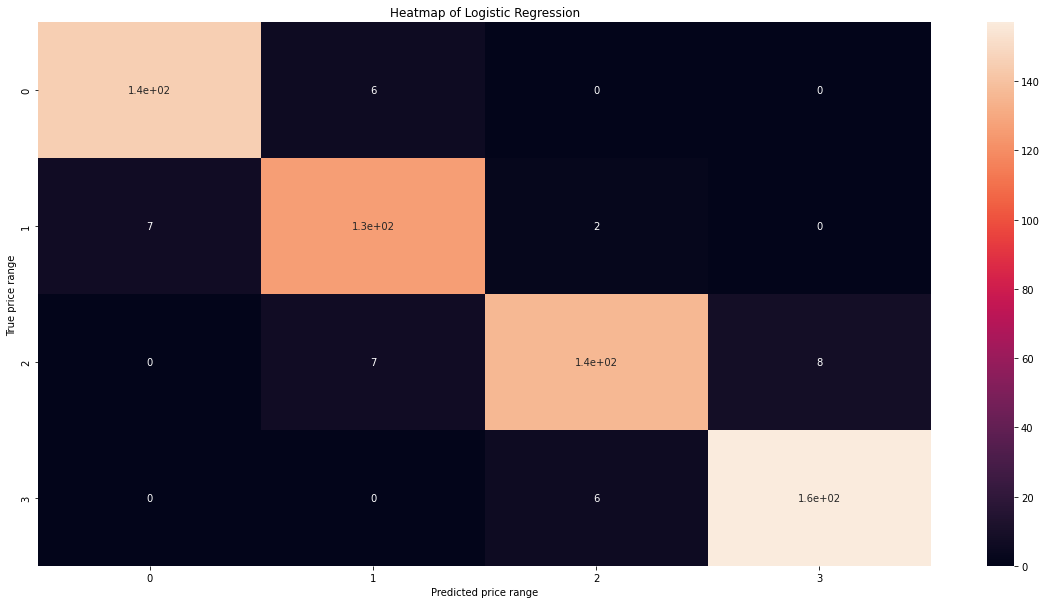

In [31]:
construct_heatmap(y_test, yhat, 'Logistic Regression')

## Support Vector Machines

In [32]:
SV = SVC()

parameters = {'kernel':['linear', 'rbf','poly','rbf','sigmoid'],
              'C':[0.01,0.1,1,10,100],
              'degree':[1,2,3,4],
              'gamma':['scale','auto']}

In [33]:
SVM_LG= GridSearchCV(SV, parameters)
SVM_LG.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'degree': [1, 2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'rbf', 'sigmoid']})

In [34]:
print('Best parameters :', SVM_LG.best_params_)
print('accuarcy :', SVM_LG.best_score_)

Best parameters : {'C': 1, 'degree': 1, 'gamma': 'scale', 'kernel': 'poly'}
accuarcy : 0.9457142857142857


In [35]:
yhat = grid_LG.predict(X_test)
print('Accuracy score :', accuracy_score(y_test, yhat))
print('F1 Score :', f1_score(y_test, yhat, average='weighted'))
print('Jaccard Score :', jaccard_score(y_test, yhat, average='weighted'))

Accuracy score : 0.94
F1 Score : 0.9399197294295292
Jaccard Score : 0.8872009754402624


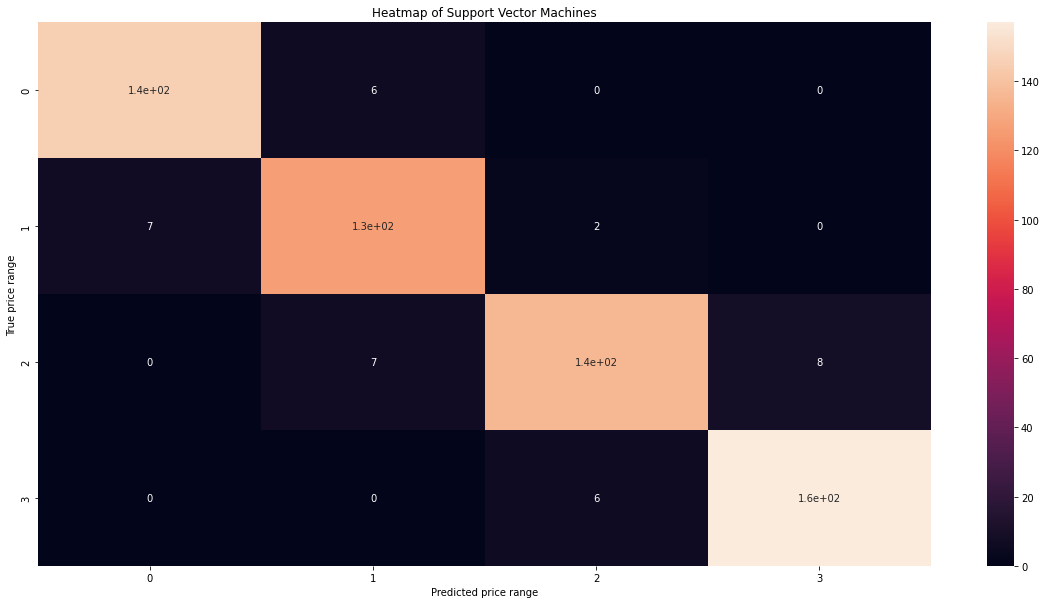

In [36]:
construct_heatmap(y_test, yhat, 'Support Vector Machines')